In [ ]:
# Check if autoreload is loaded and load/reload accordingly
try:
    %reload_ext autoreload
except:
    %load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd


# Bootstrapping Curves

Fitted parameters: a = 27.571, b = 0.350


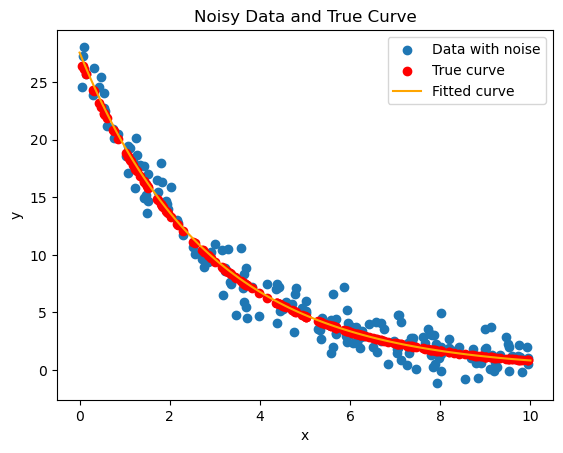

In [3]:
np.random.seed(1234)
a, b, x_range, n_x_points, N = 27, .35, 10, 10, 20
sigma_a = .05 * a
# Sample gaussian distribution
x = np.random.uniform(0, x_range, (n_x_points, N))
y_true = a * np.exp(-b * x)
noise = np.random.normal(0, sigma_a, (n_x_points, N))
y = y_true + noise
def model_func(x, a, b):
    return a * np.exp(-b * x)

popt, pcov = curve_fit(model_func, x.flatten(), y.flatten(), p0=(1., 1.))
print(f"Fitted parameters: a = {popt[0]:.3f}, b = {popt[1]:.3f}")
plt.scatter(x, y, label='Data with noise')
plt.scatter(x, y_true, label='True curve', color='red')
plt.plot(np.linspace(0, x_range, 100), model_func(np.linspace(0, x_range, 100), *popt), label='Fitted curve', color='orange')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Noisy Data and True Curve')
plt.legend()
plt.show()

(10, 20)


/var/folders/st/fgw_z95d55x71m603j17ld300000gr/T/ipykernel_87084/2002808451.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


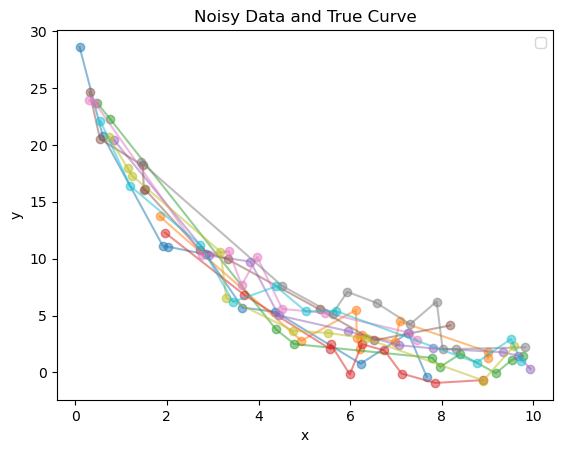

In [4]:
np.random.seed(1234)
# Change colors to tab20 colors
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
a, b, x_range, n_x_points, N = 27, .35, 10, 10, 20
sigma_a = .05 * a
sigma_b = .2 * b
# Sample gaussian distribution
x = np.random.uniform(0, x_range, (n_x_points, N))
y_true = a * np.exp(-b * x)
y_sample = a * np.exp(-np.random.normal(b, sigma_b, (N))[None, :] * x)
print(y_sample.shape)
noise = np.random.normal(0, sigma_a, (n_x_points, N))
y = y_sample + noise
# plt.scatter(x, y, label='Data with noise')
for i in range(N//2):
    y_tmp = y[x[:, i].argsort(), i]
    x_tmp = x[x[:, i].argsort(), i]
    # plt.plot(x_tmp, y_tmp, alpha=0.5)
    plt.plot(x_tmp[:], y_tmp[:], 'o-', alpha=0.5)
# plt.scatter(x, y_true)
# plt.plot(np.linspace(0, x_range, 100), a * np.exp(-b * np.linspace(0, x_range, 100)), label='True curve without b noise', color='green')
# def model_func(x, a, b):
#     return a * np.exp(-b * x)

# popt, pcov = curve_fit(model_func, x.flatten(), y.flatten(), p0=(1., 1.))
# print(f"Fitted parameters: a = {popt[0]:.3f}, b = {popt[1]:.3f}")
# plt.plot(np.linspace(0, x_range, 100), model_func(np.linspace(0, x_range, 100), *popt), label='Fitted curve', color='orange')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Noisy Data and True Curve')

plt.legend()
plt.show()

In [8]:
# Save data in pandas data file
data_dict = {}
for i in range(N):
    data_dict[f'experiment_{i}'] = {'x': x[:, i], 'y': y[:, i]}

data = []
for exp_name, exp_data in data_dict.items():
    for point_idx, (x_val, y_val) in enumerate(zip(exp_data['x'], exp_data['y'])):
        data.append((exp_name, point_idx, x_val, y_val))
df = pd.DataFrame(data, columns=['experiment', 'point', 'x', 'y'])
df = df.set_index(['experiment', 'point'])


df.to_csv('noisy_exp_data.csv')



[[ 8 16  2 ... 17 19 14]
 [19 10  1 ... 11  2 19]
 [ 2  0 12 ...  1  9 12]
 ...
 [11  4  5 ...  7  0  5]
 [ 4 15  2 ...  4  8 10]
 [13 19  1 ...  8  3  2]]
(10, 20, 1000)
Bootstrap mean of a: 26.619, std: 0.443
Bootstrap mean of b: 0.319, std: 0.019
Confidence Intervals for a:
  68%: 26.173 - 27.053
  95%: 25.752 - 27.518
Confidence Intervals for b:
  68%: 0.300 - 0.338
  95%: 0.286 - 0.356
Bootstrap mean of a: 26.619, std: 0.443
Bootstrap mean of b: 0.319, std: 0.019
Confidence Intervals for a:
  68%: 26.173 - 27.053
  95%: 25.752 - 27.518
Confidence Intervals for b:
  68%: 0.300 - 0.338
  95%: 0.286 - 0.356


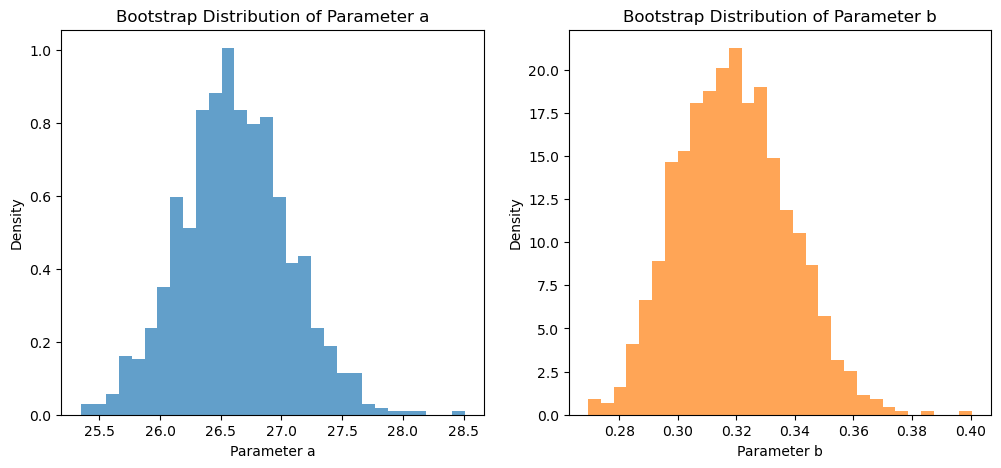

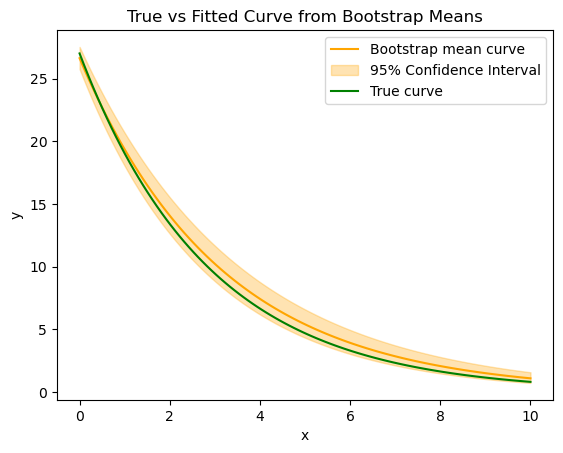

In [60]:
bootstrap_samples = 1000
i_bootstrap_samples = np.random.randint(0, N, (N, bootstrap_samples))
print(i_bootstrap_samples)
bootstrap_params = np.zeros((bootstrap_samples, 2))  # Assuming two parameters: a and b
bootstrap_x_sets = x[:, i_bootstrap_samples]
print(bootstrap_x_sets.shape)
bootstrap_data_sets = y[:, i_bootstrap_samples]
for i in range(bootstrap_samples):
    # Fit the model to the bootstrap sample
    popt, _ = curve_fit(
        model_func,
        bootstrap_x_sets[:, :, i].flatten(),
        bootstrap_data_sets[:, :, i].flatten(),
        p0=(1.0, 1.0),
    )
    # Store the fitted parameters
    bootstrap_params[i] = popt

# Plot histograms of bootstrap parameters
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(bootstrap_params[:, 0], bins=30, alpha=0.7, color="C0", density=True)
plt.xlabel("Parameter a")
plt.ylabel("Density")
plt.title("Bootstrap Distribution of Parameter a")
plt.subplot(1, 2, 2)
plt.hist(bootstrap_params[:, 1], bins=30, alpha=0.7, color="C1", density=True)
plt.xlabel("Parameter b")
plt.ylabel("Density")
plt.title("Bootstrap Distribution of Parameter b")
print(
    f"Bootstrap mean of a: {np.mean(bootstrap_params[:, 0]):.3f}, std: {np.std(bootstrap_params[:, 0]):.3f}"
)
print(
    f"Bootstrap mean of b: {np.mean(bootstrap_params[:, 1]):.3f}, std: {np.std(bootstrap_params[:, 1]):.3f}"
)
print("Confidence Intervals for a:")
print(
    f"  68%: {np.percentile(bootstrap_params[:, 0], 16):.3f} - {np.percentile(bootstrap_params[:, 0], 84):.3f}"
)
print(
    f"  95%: {np.percentile(bootstrap_params[:, 0], 2.5):.3f} - {np.percentile(bootstrap_params[:, 0], 97.5):.3f}"
)
print("Confidence Intervals for b:")
print(
    f"  68%: {np.percentile(bootstrap_params[:, 1], 16):.3f} - {np.percentile(bootstrap_params[:, 1], 84):.3f}"
)
print(
    f"  95%: {np.percentile(bootstrap_params[:, 1], 2.5):.3f} - {np.percentile(bootstrap_params[:, 1], 97.5):.3f}"
)
plt.show()
plt.figure()
plt.plot(
    np.linspace(0, x_range, 100),
    np.mean(bootstrap_params[:, 0])
    * np.exp(-np.mean(bootstrap_params[:, 1]) * np.linspace(0, x_range, 100)),
    label="Bootstrap mean curve",
    color="orange",
)
plt.fill_between(
    np.linspace(0, x_range, 100),
    (np.percentile(bootstrap_params[:, 0], 2.5))
    * np.exp(-np.percentile(bootstrap_params[:, 1], 97.5) * np.linspace(0, x_range, 100)),
    (np.percentile(bootstrap_params[:, 0], 97.5))
    * np.exp(-np.percentile(bootstrap_params[:, 1], 2.5) * np.linspace(0, x_range, 100)),
    color="orange",
    alpha=0.3,
    label="95% Confidence Interval",
)
plt.plot(
    np.linspace(0, x_range, 100),
    a * np.exp(-b * np.linspace(0, x_range, 100)),
    label="True curve",
    color="green",
)
plt.xlabel("x")
plt.ylabel("y")
plt.title("True vs Fitted Curve from Bootstrap Means")
plt.legend()
plt.show()


[[ 7  7  9 ...  6 12 10]
 [12 12  6 ... 16  3 18]
 [14 13 18 ... 11  4  2]
 ...
 [10 18 17 ... 16  2 17]
 [10  2 15 ... 19  7 12]
 [ 8 10  0 ... 16 12  2]]
(10, 20, 1000)
Bootstrap mean of a: 12.806, std: 0.918
Bootstrap mean of b: 0.420, std: 0.035
Confidence Intervals for a:
  68%: 11.985 - 13.613
  95%: 11.263 - 14.862
Confidence Intervals for b:
  68%: 0.392 - 0.444
  95%: 0.379 - 0.510
Bootstrap mean of a: 12.806, std: 0.918
Bootstrap mean of b: 0.420, std: 0.035
Confidence Intervals for a:
  68%: 11.985 - 13.613
  95%: 11.263 - 14.862
Confidence Intervals for b:
  68%: 0.392 - 0.444
  95%: 0.379 - 0.510


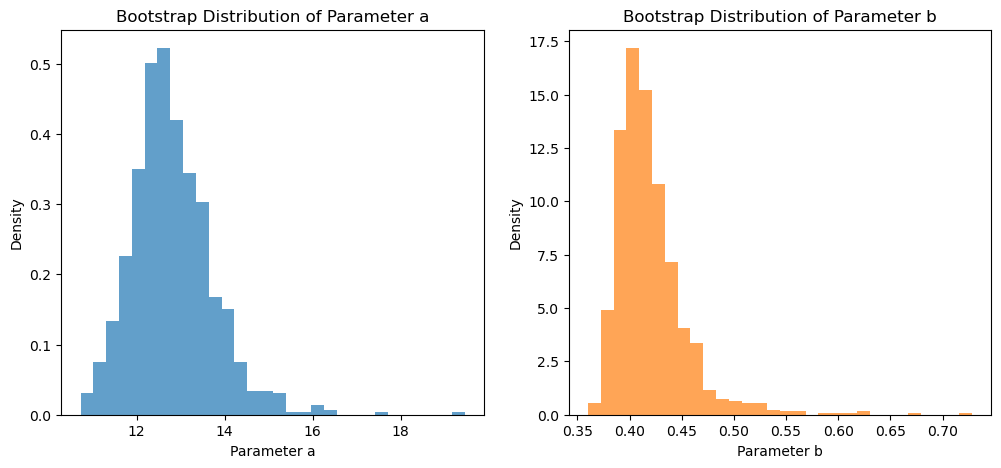

/var/folders/st/fgw_z95d55x71m603j17ld300000gr/T/ipykernel_51682/1133978917.py:41: RuntimeWarning: divide by zero encountered in power
  * np.power( np.linspace(0, x_range, 100), -np.mean(bootstrap_params[:, 1])),
/var/folders/st/fgw_z95d55x71m603j17ld300000gr/T/ipykernel_51682/1133978917.py:48: RuntimeWarning: divide by zero encountered in power
  * np.power( np.linspace(0, x_range, 100), -np.percentile(bootstrap_params[:, 1], 97.5)),
/var/folders/st/fgw_z95d55x71m603j17ld300000gr/T/ipykernel_51682/1133978917.py:50: RuntimeWarning: divide by zero encountered in power
  * np.power( np.linspace(0, x_range, 100), -np.percentile(bootstrap_params[:, 1], 2.5)),


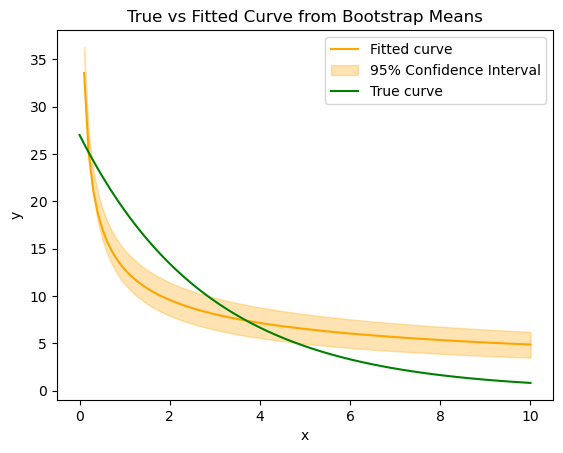

In [61]:
# Fit power law instead
bootstrap_samples = 1000
i_bootstrap_samples = np.random.randint(0, N, (N, bootstrap_samples))
print(i_bootstrap_samples)
bootstrap_params = np.zeros((bootstrap_samples, 2))  # Assuming two parameters: a and b
bootstrap_x_sets = x[:, i_bootstrap_samples]
print(bootstrap_x_sets.shape)
bootstrap_data_sets = y[:, i_bootstrap_samples]
def power_law_func(x, a, b):
    return a * np.power(x,-b)
for i in range(bootstrap_samples):
    # Fit the model to the bootstrap sample
    popt, _ = curve_fit(power_law_func, bootstrap_x_sets[:,:,i].flatten(), bootstrap_data_sets[:,:,i].flatten(), p0=(1., 1.))
    # Store the fitted parameters
    bootstrap_params[i] = popt

# Plot histograms of bootstrap parameters
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(bootstrap_params[:, 0], bins=30, alpha=0.7, color='C0', density=True)
plt.xlabel('Parameter a')
plt.ylabel('Density')
plt.title('Bootstrap Distribution of Parameter a')
plt.subplot(1, 2, 2)
plt.hist(bootstrap_params[:, 1], bins=30, alpha=0.7, color='C1', density=True)
plt.xlabel('Parameter b')
plt.ylabel('Density')
plt.title('Bootstrap Distribution of Parameter b')
print(f"Bootstrap mean of a: {np.mean(bootstrap_params[:, 0]):.3f}, std: {np.std(bootstrap_params[:, 0]):.3f}")
print(f"Bootstrap mean of b: {np.mean(bootstrap_params[:, 1]):.3f}, std: {np.std(bootstrap_params[:, 1]):.3f}")
print("Confidence Intervals for a:")
print(f"  68%: {np.percentile(bootstrap_params[:, 0], 16):.3f} - {np.percentile(bootstrap_params[:, 0], 84):.3f}")
print(f"  95%: {np.percentile(bootstrap_params[:, 0], 2.5):.3f} - {np.percentile(bootstrap_params[:, 0], 97.5):.3f}")
print("Confidence Intervals for b:")
print(f"  68%: {np.percentile(bootstrap_params[:, 1], 16):.3f} - {np.percentile(bootstrap_params[:, 1], 84):.3f}")
print(f"  95%: {np.percentile(bootstrap_params[:, 1], 2.5):.3f} - {np.percentile(bootstrap_params[:, 1], 97.5):.3f}")
plt.show()
plt.plot(
    np.linspace(0, x_range, 100),
    np.mean(bootstrap_params[:, 0])
    * np.power( np.linspace(0, x_range, 100), -np.mean(bootstrap_params[:, 1])),
    label="Fitted curve",
    color="orange",
)
plt.fill_between(
    np.linspace(0, x_range, 100),
    (np.percentile(bootstrap_params[:, 0], 2.5))
    * np.power( np.linspace(0, x_range, 100), -np.percentile(bootstrap_params[:, 1], 97.5)),
    (np.percentile(bootstrap_params[:, 0], 97.5))
    * np.power( np.linspace(0, x_range, 100), -np.percentile(bootstrap_params[:, 1], 2.5)),
    color="orange",
    alpha=0.3,
    label="95% Confidence Interval",
)
plt.plot(
    np.linspace(0, x_range, 100),
    a * np.exp(-b * np.linspace(0, x_range, 100)),
    label="True curve",
    color="green",
)

# plt.scatter(x.flatten(), y_sample.flatten())
# plt.plot(np.linspace(0, x_range, 100), bootstrap_params[123,0]
#     * np.power( np.linspace(0, x_range, 100), -bootstrap_params[123,1]), c='red')

plt.xlabel("x")
plt.ylabel("y")
plt.title("True vs Fitted Curve from Bootstrap Means")
plt.legend()
plt.show()